In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
import numpy as np
import pandas as pd

### Generating Dummy Data

In [5]:
num_samples = 1280
vocabulary_size = 10000
num_tags = 100
num_departments = 4

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

### Taking a Look at the Generated Datasets

In [6]:
pd.DataFrame(title_data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,1,0,1,0,1,1,0,1,0,0,1,1,0,1,1,1,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,1,0,0,0,1,1,0,0,...,1,1,0,1,1,1,1,1,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,1,0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1
1,1,0,1,0,1,0,1,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,1,0,1,1,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,1,1,0,1,1,1,1,1,1,0,0,1,1,1,1,0,1,1,0
2,1,0,0,1,1,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,1,1,0,0,1,...,0,1,1,1,1,1,1,1,1,1,0,0,1,1,1,0,1,0,1,1,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0,1,0,1,1,1,1,1,1,0,0,1,0,1,1,0,1,0,0,1,1,1,0,1,0,1,1,0,1,1,0,1,0,1,0,0,0,0,0,1,...,0,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,1,1,1,1,1,1,0,0,1
4,0,0,0,0,0,1,1,1,1,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,0,1,0,0,1,1,0,0,...,1,0,1,0,0,0,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,1,1,0,0,0,1,1,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,1,1,0,1,1,0,1,0,1,0,1,0,1,1,1,1,1,...,1,1,1,1,0,1,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,0,1
1276,0,1,1,1,1,1,1,1,0,0,0,1,0,0,1,0,1,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,1,1,1,0,0,0,1,1,1,1,0,0,1,1,1,0,0,0,0,1,1,0,1,0,0,1,1,0,1,1,1,1,1,0
1277,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,1,1,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,0,1
1278,0,1,1,1,0,1,1,1,0,0,0,1,1,1,0,1,0,0,1,0,1,1,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,0,0,0,...,1,1,1,1,0,1,1,0,0,0,1,0,0,1,0,1,1,0,0,0,1,1,0,1,0,1,0,0,0,0,1,1,1,0,1,0,0,1,0,1


In [7]:
pd.DataFrame(text_body_data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,0,1,...,0,1,1,0,0,0,1,0,1,0,1,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,1,1,1,0,0,0,0,1,0,0
1,1,0,1,1,1,0,0,0,0,1,1,0,1,0,1,1,0,1,0,0,1,1,1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,...,0,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,1,1,1,1,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1
2,0,1,1,0,0,1,0,0,1,1,1,1,1,0,0,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,1,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,1
3,0,0,0,1,0,1,1,0,0,1,0,0,1,0,1,1,1,1,1,0,0,1,0,1,0,1,1,1,0,0,1,1,1,1,0,0,0,1,1,1,...,1,1,1,0,0,0,0,1,1,1,0,0,1,1,1,0,0,1,1,1,0,1,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,1,0,1,1,1,1,1,1,0,0,1,0,1,0,1,1,1,1,0,1,1,1,1,1,1,0,1,1,0,0,1,...,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,1,1,1,1,0,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,1,0,0,1,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,1,1,0,0,1,1,1,0,0,0,1,0,0,1,1,0,1,1,0,0
1276,1,0,1,0,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,1,1,0,1,1,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,1,0,0
1277,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,1,0,1,1,0,1,1,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,1,0,...,0,1,0,1,0,1,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,1,1,1,0,1,1,0,0,1,0,0,0,1,1,1,1,1,1
1278,1,1,0,0,1,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,1,0,1,1,1,0,0,0,0,0,0,0,1,0,1,0,1


In [8]:
pd.DataFrame(tags_data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,1,0,0,0,0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,1,0,0,1,0,1,1,0,0,0,1,0,0,1,0,1,1,1,1,0,1,0,0,0,1,0,1,1,0,1,1,0,1,1,1,0
1,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,0,1,1,0,1,1,1,0,0,0,0,1,0,0,1,...,1,1,1,1,1,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1
2,0,1,0,0,1,0,0,1,1,0,1,0,1,1,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,1,0,1,1,1,1,1,...,0,0,1,1,0,0,0,1,0,1,1,1,1,1,0,0,1,0,0,0,1,0,0,0,1,1,0,1,1,1,1,0,1,1,0,0,1,0,1,1
3,1,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,1,1,0,0,1,0,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,...,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,1,1,1,1,1,1,0,1,1,0,0,1,0,0,0
4,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,1,0,0,0,0,0,1,0,1,1,1,0,0,0,0,1,1,1,0,0,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1,0,0,0,1,0,1,0,1,0,1,1,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,1,1,1,0,1,0,1,1,0,1,1,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,1,0,0,1,0,1,1,1,0,1,1,1,1,1,...,0,1,1,0,1,1,0,0,0,1,0,0,1,1,1,0,1,1,0,1,0,0,0,1,0,0,0,1,1,1,1,1,1,0,1,1,0,1,1,1
1276,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,1,0,1,0,1,0,1,0,1,1,1,1,1,...,1,1,0,1,0,1,1,1,1,0,1,1,1,1,0,0,0,1,0,0,1,1,1,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,0
1277,0,0,1,0,0,0,0,1,0,1,1,0,0,1,1,1,0,1,1,0,1,1,1,1,1,0,0,0,1,1,0,0,1,1,1,1,1,0,1,1,...,0,1,0,0,0,1,1,0,0,0,1,1,0,0,1,1,1,1,0,1,0,1,0,1,1,0,0,1,0,1,0,0,1,1,0,1,1,0,1,0
1278,1,1,0,0,1,1,1,1,1,0,1,0,1,0,0,1,1,0,0,0,1,1,1,0,0,1,1,1,1,0,1,1,0,1,1,1,1,1,1,0,...,1,0,1,1,1,0,1,1,1,1,1,1,0,0,0,1,1,1,0,1,1,0,1,0,0,0,0,0,1,1,1,1,0,1,0,1,0,0,1,0


In [9]:
pd.DataFrame(priority_data)

,0
0,0.279551
1,0.193663
2,0.339300
3,0.654878
4,0.000583
...,...
1275,0.826470
1276,0.550988
1277,0.169059
1278,0.700520


In [10]:
pd.DataFrame(department_data)

,0,1,2,3
0,0,0,1,0
1,1,1,1,1
2,0,1,0,1
3,0,1,1,1
4,0,1,0,1
...,...,...,...,...
1275,0,0,1,0
1276,0,0,1,1
1277,1,0,0,1
1278,0,1,0,1


In [12]:
class CustomerTicketModel(keras.Model):

    def __init__(self, num_departments):
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation="relu")
        self.priority_scorer = layers.Dense(1, activation="sigmoid")
        self.department_classifier = layers.Dense(num_departments, activation="softmax")

    def call(self, inputs):
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]

        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority, department

In [13]:
model = CustomerTicketModel(num_departments=4)

In [14]:
priority, department = model(
    {"title": title_data,
     "text_body": text_body_data,
     "tags": tags_data})

In [15]:
model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])

In [16]:
model.fit({"title": title_data,
           "text_body": text_body_data,
           "tags": tags_data},
           [priority_data, department_data],
           epochs=1)

40/40 [==============================] - 1s 6ms/step - loss: 42.1757 - output_1_loss: 0.3210 - output_2_loss: 41.8546 - output_1_mean_absolute_error: 0.4888 - output_2_accuracy: 0.3039


In [17]:
model.evaluate({"title": title_data,
           "text_body": text_body_data,
           "tags": tags_data},
           [priority_data, department_data])

40/40 [==============================] - 0s 6ms/step - loss: 23.4100 - output_1_loss: 0.3299 - output_2_loss: 23.0800 - output_1_mean_absolute_error: 0.4971 - output_2_accuracy: 0.1359


[23.409961700439453,
 0.32992544770240784,
 23.080034255981445,
 0.4971371591091156,
 0.13593749701976776]

In [23]:
priority_preds, department_preds = model.predict({"title": title_data,
                                                  "text_body": text_body_data,
                                                  "tags": tags_data})

40/40 [==============================] - 0s 6ms/step


In [24]:
department_preds = np.argmax(department_preds, axis=1)

### Visualizing the Predictions of this Dummy Model

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

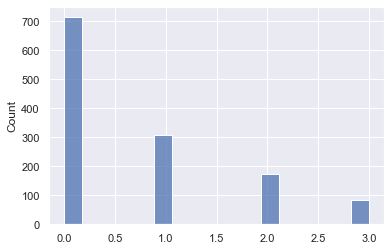

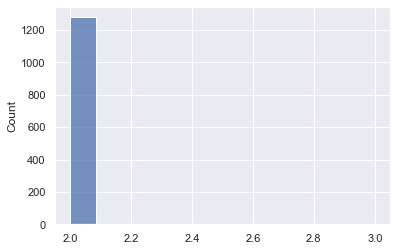

In [29]:
sns.histplot(np.argmax(department_data, axis=1))
plt.show()

sns.histplot(department_preds)
plt.show()

## Conclusion

A very bad model...